# Imports

In [1]:
import numpy as np
import pandas as pd

import consts
import phys_fn as pf
import knevitt_fn as kv

import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 17
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['font.family'] = "serif"

# Critical accretion rate $M_{crit}$

Figure 10 of Dubus 1999.

<img src="images/dubus_f10.PNG" width="500"/>

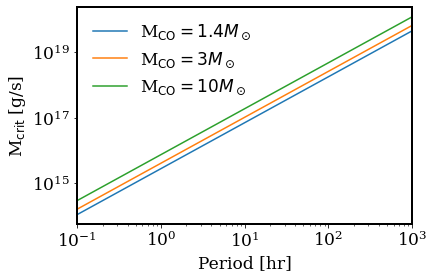

In [2]:
# grid of periods
Phr = np.linspace(.1, 1000.0) # hours
Pds = Phr / 24.

# system parameters
M2 = 0.4 # donor mass
for M1 in [1.4, 3, 10]:
    
    # critical accretion rate
    mc = pf.Mcrit_irr_D199(M1,M2, Pds) # Msol / yr
    mc *= consts.Msol / (365. * 86400)  # g/s
    
    # plot it
    plt.plot(Phr,mc,label='M$_\mathrm{CO}=$' + '${}M_\odot$'.format(M1) )
    
plt.xscale('log')
plt.yscale('log')

_ = plt.ylabel('M$_\mathrm{crit}$ [g/s]')
_ = plt.xlabel('Period [hr]')
_ = plt.legend(frameon=False)
_ = plt.xlim([0.1,1e3])

### Note:

$\texttt{Mcrit_irr_D199}$ is only for $0.03 < q < 1.0$ (because it encorporates a period-$M_\mathrm{CO}$-$M_\mathrm{donor}$ to disk-radius approximation).
To use a different period-$M_\mathrm{CO}$-$M_\mathrm{donor}$ to disk-radius function, see $\texttt{Mcrit_irr_D199_gen}$.

# Maximum disk mass

In [3]:
# grid of disk size (converted from orbital period)
M1 = 10
M2 = .4

Phr = np.linspace(.1, 1000.0) # hours
Pds = Phr / 24.

Rd  = kv.get_disksize(M1,M2,Pds) / 6.957e+10 # cm

In [4]:
temp = {
    'kstar_2' : np.ones_like(Rd), # this sets the donor as Hydrogen rich
    'Rmax'    : Rd,               # outer disk radius [Rsol]
    'Rmin'    : Rd/1500.,         # inner disk radius (ususal ISCO, here we just set 1000th the disk radius) [Rsol]
    'mass_1'  : np.ones_like(Rd)*M1
       }
df = pd.DataFrame.from_dict(temp)

mdisk_used = pf.get_mdisk(df)

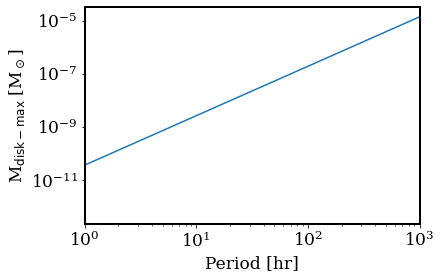

In [5]:
plt.plot(Phr, mdisk_used)

plt.xscale('log')
plt.yscale('log')

_ = plt.ylabel('M$_\mathrm{disk-max}$ [M$_\odot$]')
_ = plt.xlabel('Period [hr]')
_ = plt.xlim([1,1e3])

# LMXB light curves (Knevitt 2014)

In [6]:
# system parameters
M1 = np.array([3,5,10]) # Msol
M2 = 0.7 # Msol
P  = 10./24. # days

# Eddington rates
Ledd  = kv.get_eddington_luminoisty(M1)    # erg/s
Mdedd = kv.get_eddington_mass_transfer(M1) # Msol/yr

# disk radius
Rd  = kv.get_disksize(M1,M2,P)

# observing limit (for flux of 10mCrab and distance of 8 kpc)
Llim = 4*np.pi*(8*consts.kpc)**2 * 10*consts.CRAB*1e-3

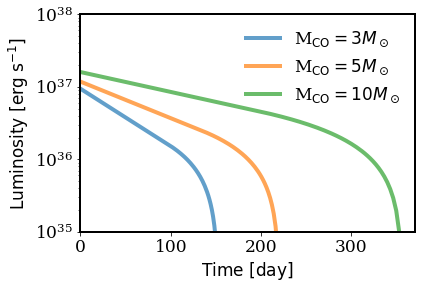

In [7]:
# lightcurves for different M_CO masses
f = 0; version = '' 
for i in range(len(M1)):
    
    # detch light curve
    t,l,td,to,lp,n = kv.get_outburst_time_vec(np.array([Rd[i]]),np.array([Ledd[i]]),np.array([Mdedd[i]]),
                                              f,version,1,Llim)
    
    # covert time to days
    t /= 86400
    
    # plot it
    plt.plot(t[l>1e30],l[l>1e30],label='M$_\mathrm{CO}=$' + '${}M_\odot$'.format(M1[i]),
            linewidth=4,alpha=0.7)
    
_ = plt.yscale('log')
_ = plt.xlim([0,None])
_ = plt.ylim([1e35,1e38])

_ = plt.legend(frameon=False,loc='upper right')

_ = plt.xlabel('$\\rm Time$ $[\mathrm{day}]$')
_ = plt.ylabel('$\\rm Luminosity$ $[\mathrm{erg~s^{-1}}]$')

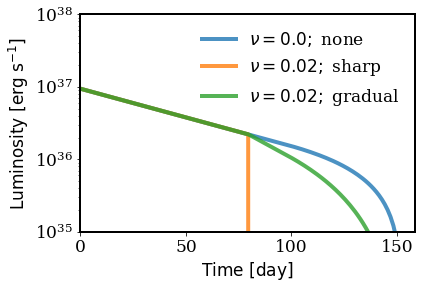

In [8]:
# lightcurves for different transitions to RIA

i = 0 # aka M = 3
for pair in [
    (0.0,'none'),
    (0.02,'sharp'),
    (0.02,'gradual'),
]:
    
    # detch light curve
    t,l,td,to,lp,n = kv.get_outburst_time_vec(np.array([Rd[i]]),np.array([Ledd[i]]),np.array([Mdedd[i]]),
                                              f=pair[0],version=pair[1],nproc=1,Lthresh=Llim)
    
    # covert time to days
    t /= 86400
    
    # plot it
    tc = t[l>33]; lc = l[l>33]
    
    plt.plot( np.append(tc, tc[-1]), np.append(lc, [1e33]),label='$\\nu={};$ {}'.format(pair[0],pair[1]),
            linewidth=4,alpha=0.8)
    
_ = plt.yscale('log')
_ = plt.xlim([0,None])
_ = plt.ylim([1e35,1e38])

_ = plt.legend(frameon=False,loc='upper right')

_ = plt.xlabel('$\\rm Time$ $[\mathrm{day}]$')
_ = plt.ylabel('$\\rm Luminosity$ $[\mathrm{erg~s^{-1}}]$')

## Peak outburst luminosity vs. Period

<img src="images/knevitt2014.png" width="500"/>

In [9]:
M1 = 8.0 #Msol
M2 = .4 #Msol

Ledd  = kv.get_eddington_luminoisty(M1)
Mdedd = kv.get_eddington_mass_transfer(M1)

P   =    10**np.linspace(-2, 2, int(1e4) ) #days
Ph  = 24*10**np.linspace(-2, 2, int(1e4) ) #days

Rd  = kv.get_disksize(M1,M2,P)

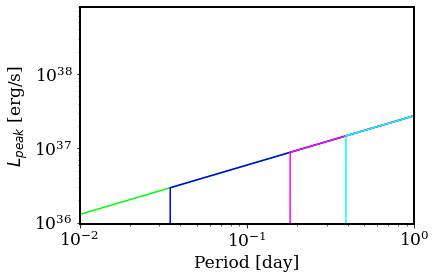

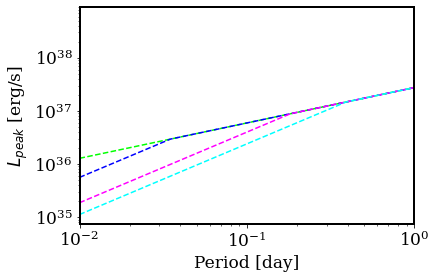

In [10]:
colors = ['lime','b','fuchsia','cyan']
styles = ['-','--']
fs     = [0,0.01,0.03,0.05]
for style, version in zip(styles, ['sharp','gradual']):
    for color, f in zip(colors,fs):
        L = kv.get_peak_RIA_luminosity(Rd, Ledd, Mdedd, f,version)
        
        plt.plot(P, L, color = color, linestyle = style)

    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel("Period [day]")
    plt.ylabel("$L_{peak}$ [erg/s]")
    
    plt.xlim([0.01, 1])
    plt.show()

# Detection probability

In [11]:
# system properties
M1 = np.array([3,5,10]) # Msol
M2 = 0.7 # Msol

# grid of orbital period
P  = 10**np.linspace(-5,5,1000) # days

# create 2D grid
PP, MM = np.meshgrid(P,M1)

# calculated system properties
disksize = kv.get_disksize(MM,M2,PP)
Ledd     = kv.get_eddington_luminoisty(MM)
Mdedd    = kv.get_eddington_mass_transfer(MM)

# quiesence time (using approximate accretion rate formula)
Tq = kv.get_quiesence_time(MM,PP,disksize)

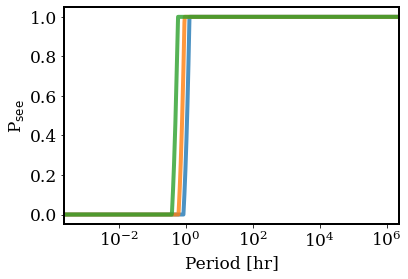

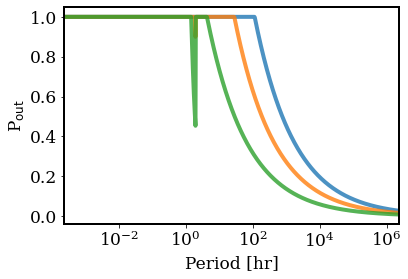

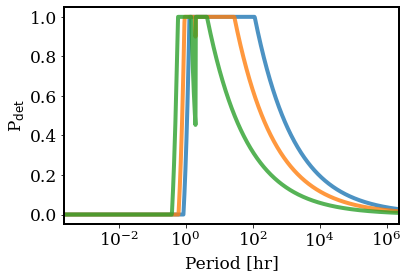

In [12]:
version = 'none'
f       = 0

Psee = []
Pout = []
Pdet = []
for i in range(len(M1)):
    
    # detch light curve
    t,l,td,to,lp,n = kv.get_outburst_time_vec(disksize[i],Ledd[i],Mdedd[i],f,version,1,Llim)
    
    # probabilities
    Psee.append( kv.calc_prob_see_outburst(td,1) )
    Pout.append( kv.calc_prob_outburst_occ(Tq[i],15*365) )
    
    Pdet.append( Psee[-1]*Pout[-1] )
    
for prob,title in zip([Psee, Pout, Pdet],['P$_\mathrm{see}$', 'P$_\mathrm{out}$', 'P$_\mathrm{det}$']):
    for i in range(len(M1)):
        plt.plot(P*24, prob[i], label = 'M$_\mathrm{CO}=$' + '${}M_\odot$'.format(M1[i]),
                linewidth=4,alpha=0.8)
        
    _ = plt.xscale('log')
    
    if title == 'Psee':
        _ = plt.legend(frameon=False)
        
    plt.xlabel('Period [hr]')
    plt.ylabel(title)
    plt.xlim([24*P.min(),24*P.max()])
    
    plt.show()